# Deep Learning Term Project for ECG (DIL700)

## Loading dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

Collect all the data from the csv files

In [2]:
import os
import pandas as pd

def combine_csv_files_to_df(dir_path):
    # Get all CSV files in the directory
    csv_files = [file for file in os.listdir(dir_path) if file.endswith('.csv')]

    df_list = [pd.read_csv(os.path.join(dir_path, file), header=None) for file in csv_files]
    combined_data = pd.concat(df_list, ignore_index=True,)

    # Display the combined DataFrame
    return(combined_data)


In [3]:
train_df=combine_csv_files_to_df('./Dataset_mitbih/Training/')
test_df=combine_csv_files_to_df('./Dataset_mitbih/Testing/')

In [4]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(train_df[187].unique())

[0. 1. 2. 3. 4.]


In [7]:
print('Number of samples in train data:')
print('Normal:                              ', len(train_df[train_df[187]==0]))
print('Atrial premature:                    ', len(train_df[train_df[187]==1]))
print('Premature ventricular contraction:   ', len(train_df[train_df[187]==2]))
print('Fusion of ventricular and normal:    ', len(train_df[train_df[187]==3]))
print('Paced:                               ', len(train_df[train_df[187]==4]))

Number of samples in train data:
Normal:                               72471
Atrial premature:                     2223
Premature ventricular contraction:    5788
Fusion of ventricular and normal:     641
Paced:                                6431


In [10]:
print('Number of samples in test data:')
print('Normal:                              ', len(test_df[test_df[187]==0]))
print('Atrial premature:                    ', len(test_df[test_df[187]==1]))
print('Premature ventricular contraction:   ', len(test_df[test_df[187]==2]))
print('Fusion of ventricular and normal:    ', len(test_df[test_df[187]==3]))
print('Paced:                               ', len(test_df[test_df[187]==4]))

Number of samples in test data:
Normal:                               18118
Atrial premature:                     556
Premature ventricular contraction:    1448
Fusion of ventricular and normal:     162
Paced:                                1608


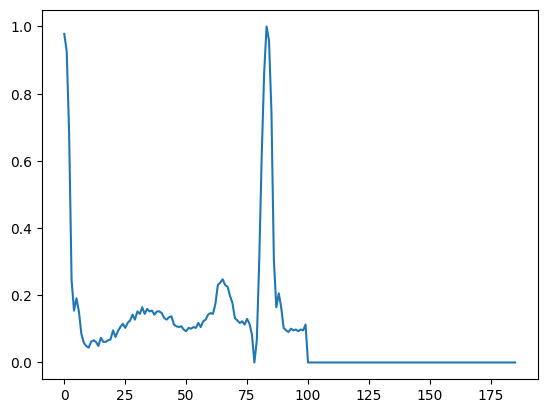

In [ ]:
ecg_example = train_df.iloc[0,:186]
plt.plot(ecg_example)

2.0


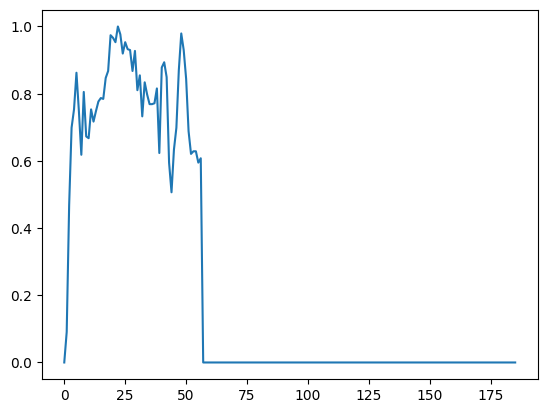

In [15]:
i = 80000
ecg_example = train_df.iloc[i,:186]
print(train_df.iloc[i,187])
plt.plot(ecg_example)